In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

# Best Hyperparameters 


## Considering Accuracy

Test loss: 0.86007, Test acc: 81.18%

LR = 0.003494286840772853

MOMENTUM = 0.9421216112061177

SCHEDULAR_NAME = "StepLR"

INIT_METHOD = "kaiming_normal"

## Considering Loss

Test loss: 0.75170, Test acc: 77.85%

LR = 0.002072036590034204

MOMENTUM = 0.8654547796718208

SCHEDULAR_NAME = "StepLR"

INIT_METHOD = "kaiming_normal"

In [29]:
pd.set_option("display.max_column", None)
pd.set_option("display.width", 500)
results1 = pd.read_csv('hyperparameter_optimization_results1.csv')
results2 = pd.read_csv('hyperparameter_optimization_results2.csv')

In [46]:
categorical_columns = results1.select_dtypes(include=['object']).columns
numerical_columns = results1.select_dtypes(include=['float64', 'int64']).columns

In [47]:
categorical_columns2 = results2.select_dtypes(include=['object']).columns
numerical_columns2 = results2.select_dtypes(include=['float64', 'int64']).columns

In [10]:
results2.sort_values(by='value', ascending=True).head(5)


,value,duration,params_init_method,params_lr,params_momentum,params_optimizer,params_scheduler_name,state
48,0.757051,0 days 00:01:56.842949,he,0.001852,0.870915,SGD,StepLR,COMPLETE
44,0.763579,0 days 00:01:57.029722,he,0.002010,0.888388,SGD,StepLR,COMPLETE
49,0.763873,0 days 00:01:57.250081,he,0.001822,0.869261,SGD,StepLR,COMPLETE
43,0.779509,0 days 00:01:57.005153,he,0.001693,0.884424,SGD,StepLR,COMPLETE
45,0.785600,0 days 00:01:57.112119,he,0.001733,0.890472,SGD,StepLR,COMPLETE


In [48]:
# Summary statistics of numerical columns
numerical_summary = results1.describe()

numerical_summary.T


,count,mean,std,min,25%,50%,75%,max
value,46.0,1.036050,0.463236,0.727430,0.789715,0.870348,0.971315,2.303319
params_lr,50.0,0.001717,0.001103,0.000069,0.000889,0.001521,0.002424,0.004710
params_momentum,36.0,0.926901,0.033856,0.855895,0.900443,0.929126,0.949251,0.989470


In [49]:
# Summary statistics of numerical columns
numerical_summary2 = results2.describe()

numerical_summary2.T

,count,mean,std,min,25%,50%,75%,max
value,48.0,1.084062,0.480568,0.757051,0.841519,0.894294,1.103065,2.303040
params_lr,50.0,0.001762,0.001275,0.000064,0.000668,0.001663,0.002336,0.004993
params_momentum,36.0,0.926789,0.043519,0.854697,0.887768,0.922055,0.969647,0.989963


## Analysis on 'FAIL' state and hyperparameters

### Opt 1

In [50]:

# Isolating the failed trials at optimization 1
failed_trials1 = results1[results1['state'] == 'FAIL']

# Examining the hyperparameters and configurations of failed trials
failed_trials_summary1 = failed_trials1.describe(include='all')

failed_trials_summary1

(        value                duration params_init_method  params_lr  params_momentum params_optimizer params_scheduler params_scheduler_name state
 count     0.0                       4                  4   4.000000         4.000000                4                4                     4     4
 unique    NaN                       4                  1        NaN              NaN                1                2                     1     1
 top       NaN  0 days 00:01:59.720479       trunc_normal        NaN              NaN              SGD           StepLR         ExponentialLR  FAIL
 freq      NaN                       1                  4        NaN              NaN                4                3                     4     4
 mean      NaN                     NaN                NaN   0.002476         0.884032              NaN              NaN                   NaN   NaN
 std       NaN                     NaN                NaN   0.001217         0.008069              NaN          

### Opt 2

In [51]:

# Isolating the failed trials at optimization 1
failed_trials2 = results2[results2['state'] == 'FAIL']

# Examining the hyperparameters and configurations of failed trials
failed_trials_summary2 = failed_trials2.describe(include='all')

failed_trials_summary2

(        value                duration params_init_method  params_lr  params_momentum params_optimizer params_scheduler_name state
 count     0.0                       2                  2   2.000000         2.000000                2                     2     2
 unique    NaN                       2                  1        NaN              NaN                1                     2     1
 top       NaN  0 days 00:01:58.553571       trunc_normal        NaN              NaN              SGD     CosineAnnealingLR  FAIL
 freq      NaN                       1                  2        NaN              NaN                2                     1     2
 mean      NaN                     NaN                NaN   0.004092         0.937415              NaN                   NaN   NaN
 std       NaN                     NaN                NaN   0.000644         0.023924              NaN                   NaN   NaN
 min       NaN                     NaN                NaN   0.003637         0.9204

### Comments

The trunc_normal weight initialization method and higher learning rates appear more frequently in failed trials, indicating potential areas of concern.

The exclusive appearance of SGD in failed trials could point towards its configuration or its interaction with other parameters as a potential issue in specific scenarios.


## Loss distribution

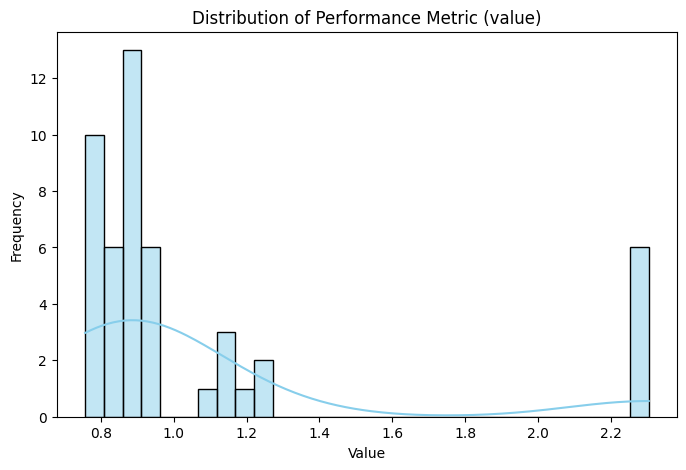

In [52]:
# Plotting the distribution of 'value' again for a clearer view
plt.figure(figsize=(8, 5))
sns.histplot(results2['value'].dropna(), kde=True, bins=30, color='skyblue')
plt.title('Distribution of Performance Metric (value)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

A value around 2.2 signals the model's failure to converge, highlighting issues in learning from the training data. This suggests potential misalignments in `hyperparameters`, `insufficient training`, or `model architecture limitations`. Identifying these factors is essential for enhancing model performance.

In [98]:
# Filter experiments around the non-convergence value (2.2)
non_converging_experiments1 = results1[(results1['value'] > 2.1)]
converging_experiments1 = results1[(results1['value'] < 2.1)]

# Analysis for continuous hyperparameters (params_lr and params_momentum)
lr_no_converge1 = non_converging_experiments1['params_lr'].describe()

# lr parameter for entire dataset except failed trials
lr_converge1 = results1[results2['value'] < 2.2]['params_lr'].describe()


# Put the two Series objects in a DataFrame for easy comparison
lr_comparison1 = pd.DataFrame({'lr_no_converge': lr_no_converge1, 'lr_converge': lr_converge1})

momentum_stats = non_converging_experiments1['params_momentum'].describe().T

# Frequency analysis for categorical hyperparameters
init_method_freq = non_converging_experiments1['params_init_method'].value_counts()
optimizer_freq = non_converging_experiments1['params_optimizer'].value_counts()
scheduler_freq = non_converging_experiments1['params_scheduler_name'].value_counts()

print('############################################')
print('lr_comparison1')
print(lr_comparison1)
print('############################################')
print('init_method_freq')
print(init_method_freq)
print('############################################')
print('optimizer_freq')
print(optimizer_freq)
print('############################################')
print('scheduler_freq')
print(scheduler_freq)

############################################
lr_comparison1
       lr_no_converge  lr_converge
count        5.000000    42.000000
mean         0.002169     0.001668
std          0.001770     0.001082
min          0.000518     0.000069
25%          0.000540     0.000863
50%          0.002081     0.001521
75%          0.002995     0.002241
max          0.004710     0.004710
############################################
init_method_freq
params_init_method
xavier_uniform    3
trunc_normal      2
Name: count, dtype: int64
############################################
optimizer_freq
params_optimizer
SGD        2
Adam       2
RMSprop    1
Name: count, dtype: int64
############################################
scheduler_freq
params_scheduler_name
CosineAnnealingLR    2
ExponentialLR        2
StepLR               1
Name: count, dtype: int64


In [54]:
# Filter experiments around the non-convergence value (2.2)
non_converging_experiments2 = results2[(results2['value'] > 2.1)]
converging_experiments2 = results2[(results2['value'] < 2.1)]

# Analysis for continuous hyperparameters (params_lr and params_momentum)
lr_no_converge2 = non_converging_experiments2['params_lr'].describe()

# lr parameter for entire dataset except failed trials
lr_converge2 = results2[results2['value'] < 2.2]['params_lr'].describe()


# Put the two Series objects in a DataFrame for easy comparison
lr_comparison2 = pd.DataFrame({'lr_no_converge': lr_no_converge2, 'lr_converge': lr_converge2})
print(lr_comparison2)

momentum_stats = non_converging_experiments2['params_momentum'].describe().T

# Frequency analysis for categorical hyperparameters
init_method_freq = non_converging_experiments2['params_init_method'].value_counts()
optimizer_freq = non_converging_experiments2['params_optimizer'].value_counts()
scheduler_freq = non_converging_experiments2['params_scheduler_name'].value_counts()


       lr_no_converge  lr_converge
count        6.000000    42.000000
mean         0.002270     0.001579
std          0.001652     0.001124
min          0.000639     0.000064
25%          0.001019     0.000542
50%          0.001966     0.001607
75%          0.003005     0.002036
max          0.004993     0.004599


In [62]:
# Groupby the 'params_optimizer' column and calculate the mean of the 'value' column
optimizer_performance1 = results1.groupby('params_optimizer')['value'].mean()
# Groupby the 'params_scheduler_name' column and calculate the mean of the 'value' column
scheduler_performance1 = results1.groupby('params_scheduler_name')['value'].mean()
# Groupby the 'params_init_method' column and calculate the mean of the 'value' column
init_method_performance1 = results1.groupby('params_init_method')['value'].mean()


In [82]:
# Divide momentum into 5 bins
momentum_bins1 = pd.cut(results1['params_momentum'], bins=5)
# Group the momentum_bins and calculate the mean of the 'value' column
momentum_performance1 = results1.groupby(momentum_bins1)['value'].mean()

# Divide the lr into 5 bins
lr_bins1 = pd.cut(results1['params_lr'], bins=5)
# Add the lr_bins to the converging_experiments2 DataFrame
converging_experiments1['lr_bins'] = lr_bins1
results1['lr_bins'] = lr_bins1



# Group the lr_bins and calculate the mean of the 'value' column
lr_performance1 = results1.groupby(lr_bins1)['value'].mean()

/var/folders/yk/ytz7qk2s2fqgv5qxfnfhcvj80000gn/T/ipykernel_35196/866275251.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  momentum_performance1 = results1.groupby(momentum_bins1)['value'].mean()
/var/folders/yk/ytz7qk2s2fqgv5qxfnfhcvj80000gn/T/ipykernel_35196/866275251.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  converging_experiments1['lr_bins'] = lr_bins1
/var/folders/yk/ytz7qk2s2fqgv5qxfnfhcvj80000gn/T/ipykernel_35196/866275251.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of

In [64]:
# Groupby the 'params_optimizer' column and calculate the mean of the 'value' column
optimizer_performance2 = results2.groupby('params_optimizer')['value'].mean()
# Groupby the 'params_scheduler_name' column and calculate the mean of the 'value' column
scheduler_performance2 = results2.groupby('params_scheduler_name')['value'].mean()
# Groupby the 'params_init_method' column and calculate the mean of the 'value' column
init_method_performance2 = results2.groupby('params_init_method')['value'].mean()


In [81]:
# Divide momentum into 5 bins
momentum_bins2 = pd.cut(results2['params_momentum'], bins=5)
# Group the momentum_bins and calculate the mean of the 'value' column
momentum_performance2 = results2.groupby(momentum_bins2)['value'].mean()

# Divide the lr into 5 bins
lr_bins2 = pd.cut(results2['params_lr'], bins=5)
# Add the lr_bins to the converging_experiments2 DataFrame
converging_experiments2['lr_bins'] = lr_bins2
results2['lr_bins'] = lr_bins2



# Group the lr_bins and calculate the mean of the 'value' column
lr_performance2 = results2.groupby(lr_bins2)['value'].mean()

/var/folders/yk/ytz7qk2s2fqgv5qxfnfhcvj80000gn/T/ipykernel_35196/419384074.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  momentum_performance2 = results2.groupby(momentum_bins2)['value'].mean()
/var/folders/yk/ytz7qk2s2fqgv5qxfnfhcvj80000gn/T/ipykernel_35196/419384074.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  converging_experiments2['lr_bins'] = lr_bins2
/var/folders/yk/ytz7qk2s2fqgv5qxfnfhcvj80000gn/T/ipykernel_35196/419384074.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of

# Comparison Graphs

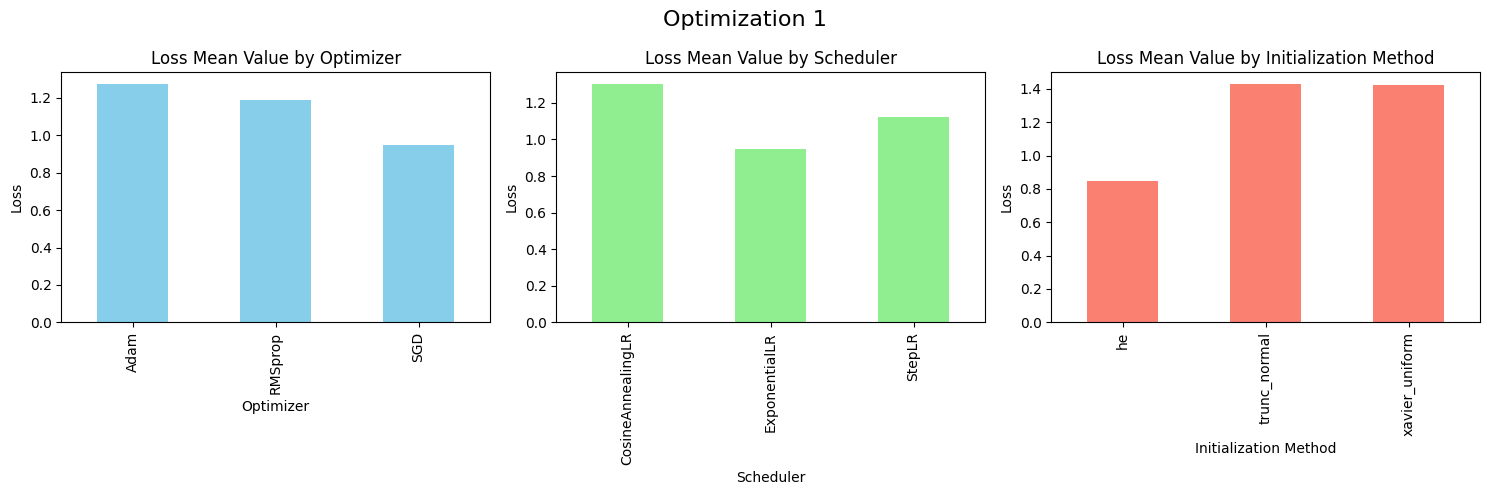

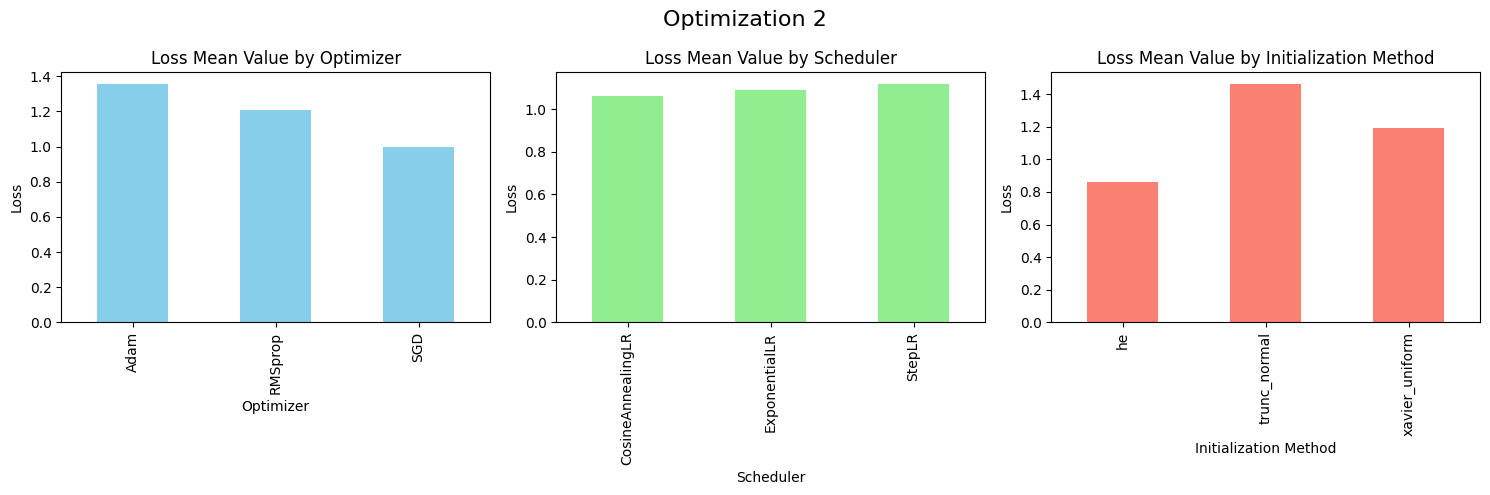

In [79]:
# Optimization 1
# Optimizer, Scheduler and Initialization Method effect on the loss mean value

plt.figure(figsize=(15, 5))
plt.suptitle('Optimization 1', fontsize=16)
plt.subplot(1, 3, 1)
optimizer_performance1.plot(kind='bar', color='skyblue')
plt.title('Loss Mean Value by Optimizer')
plt.ylabel('Loss')
plt.xlabel('Optimizer')


plt.subplot(1, 3, 2)
scheduler_performance1.plot(kind='bar', color='lightgreen')
plt.title('Loss Mean Value by Scheduler')
plt.ylabel('Loss')
plt.xlabel('Scheduler')


plt.subplot(1, 3, 3)
init_method_performance1.plot(kind='bar', color='salmon')
plt.title('Loss Mean Value by Initialization Method')
plt.ylabel('Loss')
plt.xlabel('Initialization Method')

plt.tight_layout()
plt.show()

# Optimization 2 results
# Optimizer, Scheduler and Initialization Method effect on the loss mean value

plt.figure(figsize=(15, 5))
plt.suptitle('Optimization 2', fontsize=16)
plt.subplot(1, 3, 1)
optimizer_performance2.plot(kind='bar', color='skyblue')
plt.title('Loss Mean Value by Optimizer')
plt.ylabel('Loss')
plt.xlabel('Optimizer')


plt.subplot(1, 3, 2)
scheduler_performance2.plot(kind='bar', color='lightgreen')
plt.title('Loss Mean Value by Scheduler')
plt.ylabel('Loss')
plt.xlabel('Scheduler')


plt.subplot(1, 3, 3)
init_method_performance2.plot(kind='bar', color='salmon')
plt.title('Loss Mean Value by Initialization Method')
plt.ylabel('Loss')
plt.xlabel('Initialization Method')

plt.tight_layout()
plt.show()



Text(0.5, 0, 'Learning Rate')

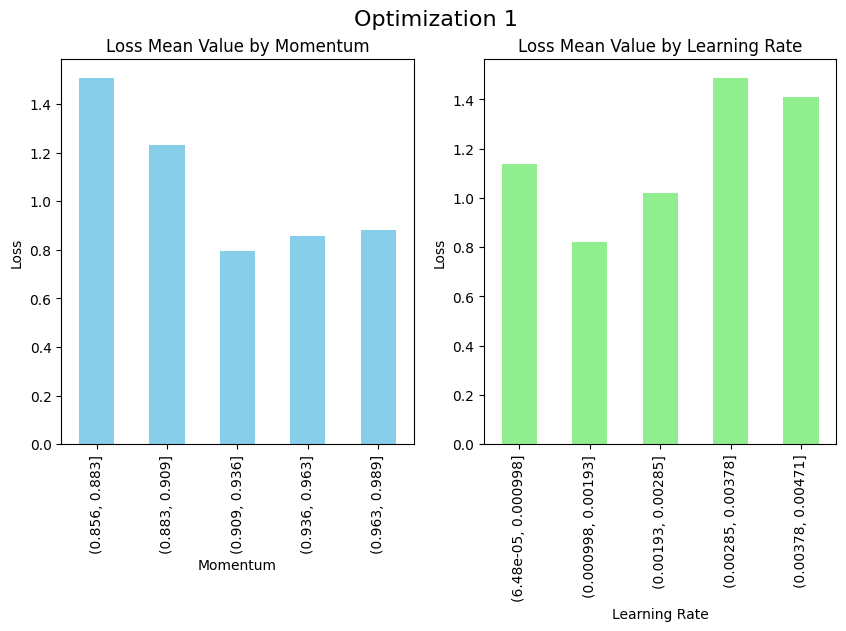

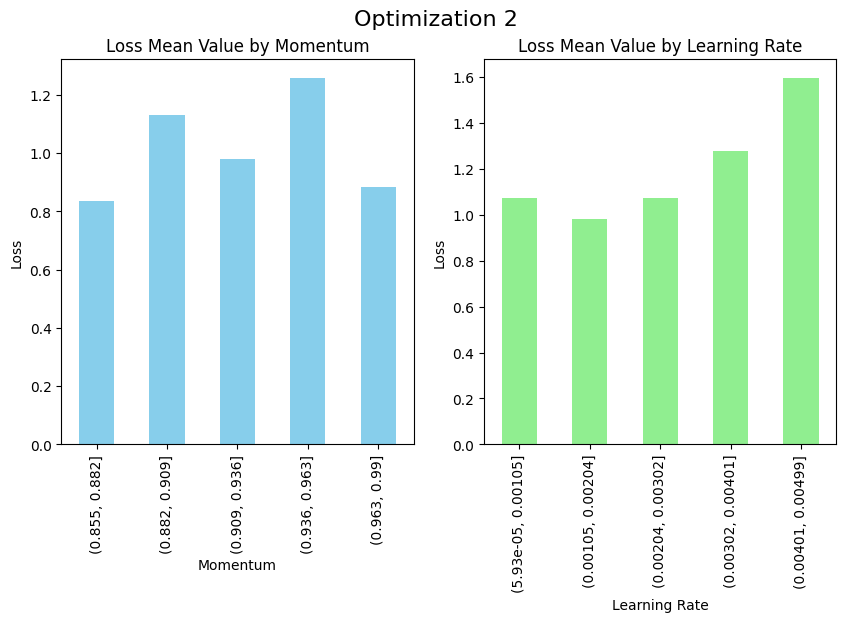

In [87]:
# Optimization 1
# Momentum and lr effect on loss 

plt.figure(figsize=(10, 5))
plt.suptitle('Optimization 1', fontsize=16)
plt.subplot(1, 2, 1)
momentum_performance1.plot(kind='bar', color='skyblue')
plt.title('Loss Mean Value by Momentum')
plt.ylabel('Loss')
plt.xlabel('Momentum')

plt.subplot(1, 2, 2)
lr_performance1.plot(kind='bar', color='lightgreen')
plt.title('Loss Mean Value by Learning Rate')
plt.ylabel('Loss')
plt.xlabel('Learning Rate')



# Optimization 2
# Momentum and lr effect on loss 

plt.figure(figsize=(10, 5))
plt.suptitle('Optimization 2', fontsize=16)
plt.subplot(1, 2, 1)
momentum_performance2.plot(kind='bar', color='skyblue')
plt.title('Loss Mean Value by Momentum')
plt.ylabel('Loss')
plt.xlabel('Momentum')


plt.subplot(1, 2, 2)
lr_performance2.plot(kind='bar', color='lightgreen')
plt.title('Loss Mean Value by Learning Rate')
plt.ylabel('Loss')
plt.xlabel('Learning Rate')

/var/folders/yk/ytz7qk2s2fqgv5qxfnfhcvj80000gn/T/ipykernel_35196/770584283.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  optimizer_lr_performance1 = results1.groupby(['params_optimizer', 'lr_bins'])['value'].mean().unstack()
/var/folders/yk/ytz7qk2s2fqgv5qxfnfhcvj80000gn/T/ipykernel_35196/770584283.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  optimizer_lr_performance2 = results2.groupby(['params_optimizer', 'lr_bins'])['value'].mean().unstack()


Text(0, 0.5, 'Loss')

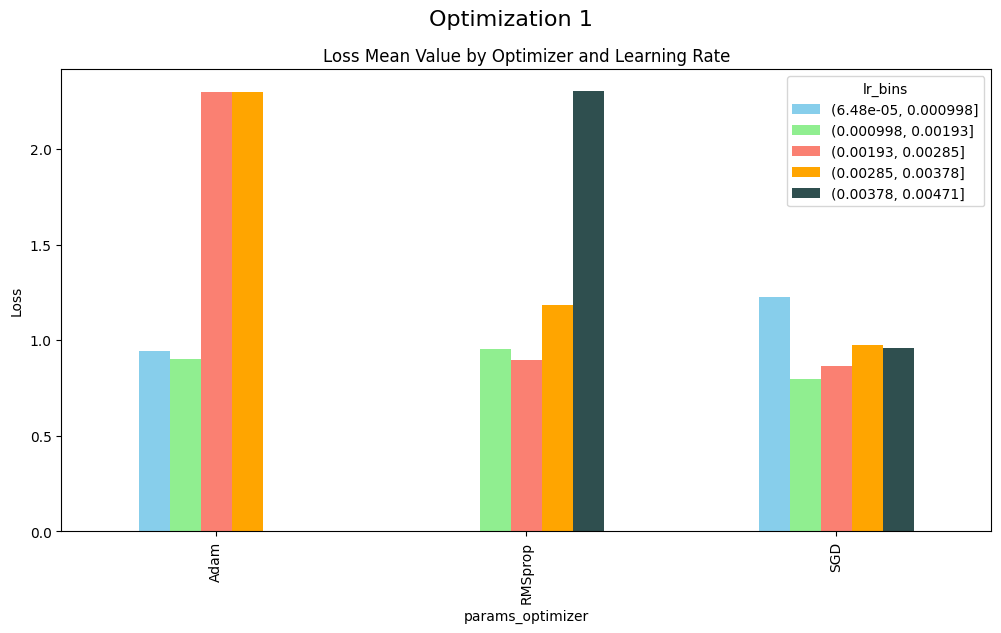

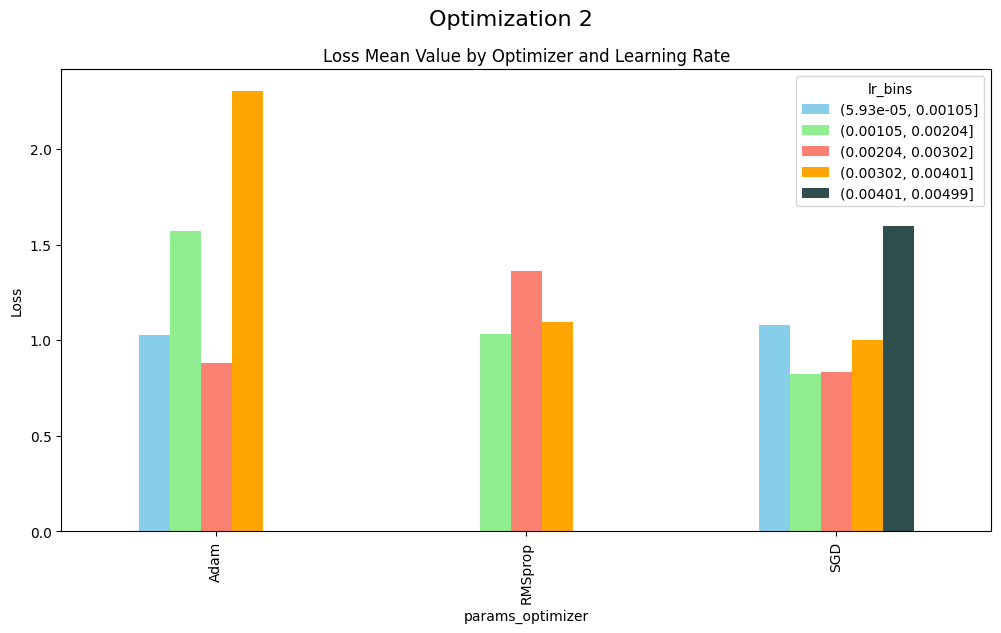

In [92]:
# Groupby the 'params_optimizer' and 'lr_bins1' columns and calculate the mean of the 'value' column
optimizer_lr_performance1 = results1.groupby(['params_optimizer', 'lr_bins'])['value'].mean().unstack()
# Visualize the optimizer_lr_performance DataFrame
optimizer_lr_performance1.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'lightgreen', 'salmon', 'orange', 'darkslategray'])
plt.suptitle('Optimization 1', fontsize=16)
plt.title('Loss Mean Value by Optimizer and Learning Rate')
plt.ylabel('Loss')

# Groupby the 'params_optimizer' and 'lr_bins1' columns and calculate the mean of the 'value' column
optimizer_lr_performance2 = results2.groupby(['params_optimizer', 'lr_bins'])['value'].mean().unstack()
# Visualize the optimizer_lr_performance DataFrame
optimizer_lr_performance2.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'lightgreen', 'salmon', 'orange', 'darkslategray'])
plt.suptitle('Optimization 2', fontsize=16)
plt.title('Loss Mean Value by Optimizer and Learning Rate')
plt.ylabel('Loss')



# Regularization Effects

In [15]:
reg_df = pd.read_csv('regularization_comparison.csv')

In [18]:
reg_df.drop(columns=['datetime_start'], inplace=True)

In [21]:
reg_df

,number,value,duration,params_reg_method,system_attrs_grid_id,system_attrs_search_space,state
0,0,0.8358,0 days 00:05:13.772804,Data Augmentation,0,"{'reg_method': ['No_Regularization', 'Weight D...",COMPLETE
1,1,0.8333,0 days 00:05:15.395362,Data Augmentation - WD: 0.0001,1,"{'reg_method': ['No_Regularization', 'Weight D...",COMPLETE
2,2,0.8101,0 days 00:03:33.000615,Weight Decay: 0.0001,2,"{'reg_method': ['No_Regularization', 'Weight D...",COMPLETE
3,3,0.8139,0 days 00:03:32.983283,Weight Decay: 0.0005,3,"{'reg_method': ['No_Regularization', 'Weight D...",COMPLETE
4,4,0.8379,0 days 00:05:15.934247,Data Augmentation - WD: 0.0005,4,"{'reg_method': ['No_Regularization', 'Weight D...",COMPLETE
5,5,0.8043,0 days 00:03:31.035980,No_Regularization,5,"{'reg_method': ['No_Regularization', 'Weight D...",COMPLETE


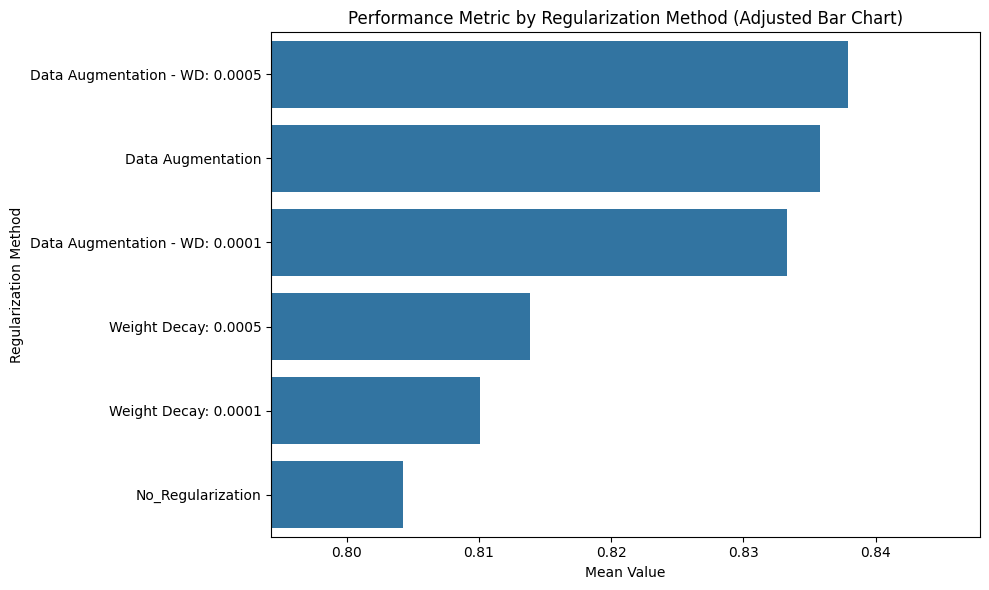

In [27]:
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='value', y='params_reg_method', data=reg_df.sort_values('value', ascending=False))
plt.title('Performance Metric by Regularization Method (Adjusted Bar Chart)')
plt.xlabel('Mean Value')
plt.ylabel('Regularization Method')

# Setting x-axis limits to zoom in on the differences
bar_plot.set_xlim(reg_df['value'].min() - 0.01, reg_df['value'].max() + 0.01)

plt.tight_layout()
plt.show()